In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

%matplotlib inline

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
plt.rc('font', size=16)

In [4]:
def load_files(filename, model = 'FM2', truth_e=25):
    data = defaultdict(list)
    algos_set = False
    for i in range(1001):
        try:
            with open(filename % i, 'rb') as f:
                single = pickle.load(f)
        except:
            continue
        if not algos_set:
            algos = list(single.keys())
            algos_set = True
        for k, v in single.items():
            if not k.endswith('_e'):
                for dim in ['x', 'y']:
                    data[k + '_' + dim].append(v[dim])
            elif k.endswith('n_e'):
                data[k].append(v['e'])
            elif k.endswith('x_e'):
                data[k].append(v)

    algos.remove('truth')
    
    if model == 'FM3':
        algos.remove('BOLFI_median_e')
        algos.remove('BOLFI_mean_e')
        algos.remove('pax_e')
        
    df = pd.DataFrame(data)
    df['truth_r'] = (df['truth_x']**2 + df['truth_y']**2)**0.5
    
    print('Mean distance from true position over %d reconstructed events' % len(df))
    for algo in algos:
        df[algo + '_d'] = ((df[algo + '_x'] - df['truth_x'])**2 + (df[algo + '_y'] - df['truth_y'])**2)**0.5
        print(algo, "%.2f cm" % df[algo + '_d'].mean())
    
    for algo in ['BOLFI_mean', 'PosRecTopPatternFit', 'PosRecNeuralNet']:
        algo_e = algo
        if algo in ['PosRecTopPatternFit', 'PosRecNeuralNet']:
            algo_e = 'pax'
        df[algo + '_d_e'] = ((df[algo + '_x'] - df['truth_x'])**2 + (df[algo + '_y'] - df['truth_y'])**2 + (df[algo_e + '_e'] - truth_e)**2)**0.5
    
    return df, algos

In [5]:
# Files with top hitp -> bc and full hitp -> energy dist
df_25, algos_1 = load_files("FM3_bc_top_e_full_25/bolfi_results_%d.pkl", 'FM3', 25)
df_10, algos = load_files("FM3_bc_top_e_full_10/bolfi_results_%d.pkl", 'FM3', 10)
assert set(algos_1) == set(algos)

Mean distance from true position over 983 reconstructed events
BOLFI_mode 2.78 cm
BOLFI_median 0.76 cm
PosRecTopPatternFit 0.79 cm
BOLFI_mean 0.76 cm
PosRecNeuralNet 1.07 cm
Mean distance from true position over 1000 reconstructed events
BOLFI_mode 2.64 cm
BOLFI_median 1.09 cm
PosRecTopPatternFit 1.17 cm
BOLFI_mean 1.09 cm
PosRecNeuralNet 1.53 cm


In [6]:
df_25.head()

,BOLFI_mean_e,BOLFI_mean_x,BOLFI_mean_y,BOLFI_median_e,BOLFI_median_x,BOLFI_median_y,BOLFI_mode_x,BOLFI_mode_y,PosRecNeuralNet_x,PosRecNeuralNet_y,...,truth_y,truth_r,BOLFI_mode_d,BOLFI_median_d,PosRecTopPatternFit_d,BOLFI_mean_d,PosRecNeuralNet_d,BOLFI_mean_d_e,PosRecTopPatternFit_d_e,PosRecNeuralNet_d_e
0,24.006356,-11.799646,-7.657720,24.006881,-11.768363,-7.583045,-9.040198,-4.531235,-10.745449,-7.689920,...,-6.37732,13.622838,3.520563,1.235489,1.023427,1.302382,1.842118,1.638148,2.088477,2.589929
1,24.375343,-25.367730,-38.169750,24.328978,-25.372665,-38.261408,-27.383996,-39.038029,-25.820428,-38.665255,...,-39.00569,47.513764,0.254638,1.909758,1.343890,1.951768,1.354472,2.049292,1.345660,1.356228
2,24.127534,-7.789849,-10.992879,23.996397,-7.731340,-11.060829,-6.573937,-9.090650,-7.315925,-11.091779,...,-10.92799,13.512396,2.294054,0.253775,0.250963,0.170547,0.652535,0.888979,1.558669,1.671008
3,25.132164,-35.523966,-7.275154,25.091343,-35.486266,-7.308237,-39.953136,-11.572991,-35.109554,-6.711250,...,-8.05283,36.561490,5.549000,0.765425,0.252939,0.790118,1.451495,0.801095,0.327384,1.466301
4,23.928923,5.123061,-44.418083,23.899880,5.125137,-44.711745,5.326815,-47.481781,5.598648,-43.978021,...,-43.30615,43.635535,4.175703,1.423687,1.327905,1.135132,0.715927,1.560683,1.938674,1.583564


# Histograms

In [8]:
# TPF, NN, BOLFI_mean
# 10, 25e
# top, full

# x,y histograms

# x,y,e histogram

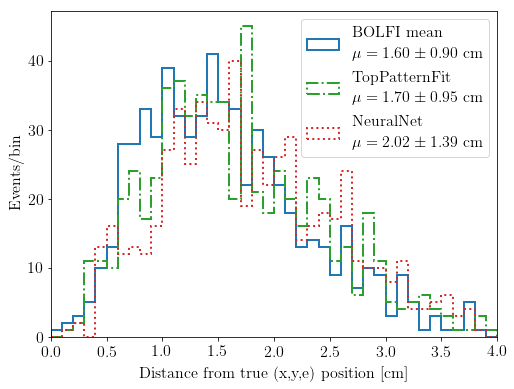

In [51]:
nbins = 40
hist_r = (0, 4)
r_cut = True

# FM3 paper plots s2_electrons = 10, top
plt.figure(figsize=(8,6))
for algo in ['BOLFI_mean', 'PosRecTopPatternFit', 'PosRecNeuralNet']:
    if algo in ['BOLFI_mode', 'BOLFI_median']:
        continue
    if algo == 'PosRecNeuralNet':
        pl_df = df_10
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d_e'].mean()
        std = pl_df[algo + '_d_e'].std()
        plt.hist(pl_df[algo + '_d_e'], bins = nbins, range=hist_r, linestyle=':',
                 histtype='step', linewidth=2, color='C3', label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
    # if algo == 'pax':
    #     pl_df = df_10
    #     if r_cut:
    #         pl_df = pl_df[pl_df['truth_r'] > 30]
    #     mu = pl_df[algo + '_e'].mean()
    #     std = pl_df[algo + '_e'].std()
    #     plt.hist(pl_df[algo + '_e'], bins = nbins, range=hist_r, linestyle=':',
    #              histtype='step', linewidth=2, color='C3', label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
    elif algo == 'PosRecTopPatternFit':
        pl_df = df_10
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d_e'].mean()
        std = pl_df[algo + '_d_e'].std()
        plt.hist(pl_df[algo + '_d_e'], bins = nbins, range=hist_r, linestyle='-.',
                 histtype='step', linewidth=2, color='C2', label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
    else:
        pl_df = df_10
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d_e'].mean()
        std = pl_df[algo + '_d_e'].std()
        plt.hist(pl_df[algo + '_d_e'], bins = nbins, range=hist_r, linestyle='-',
                 histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
        
plt.legend(loc='upper right')
plt.xlabel('Distance from true (x,y,e) position [cm]')
plt.ylabel('Events/bin')
plt.xlim(*hist_r)
if r_cut:
    plt.savefig('FM3_mix_xye_s2_electrons_10_r_30.png', bbox_inches='tight', dpi=150)
else:
    plt.savefig('FM3_mix_xye_s2_electrons_10.png', bbox_inches='tight', dpi=150)
plt.show()

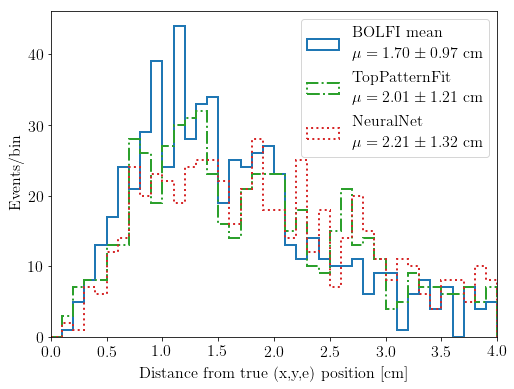

In [52]:
nbins = 40
hist_r = (0, 4)
r_cut = True

## FM3 paper plots s2_electrons = 25
plt.figure(figsize=(8,6))
for algo in ['BOLFI_mean', 'PosRecTopPatternFit', 'PosRecNeuralNet']:
    if algo in ['BOLFI_mode', 'BOLFI_median']:
        continue
    if algo == 'PosRecNeuralNet':
        pl_df = df_25
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d_e'].mean()
        std = pl_df[algo + '_d_e'].std()
        plt.hist(pl_df[algo + '_d_e'], bins = nbins, range=hist_r, linestyle=':',
                 histtype='step', linewidth=2, color='C3', label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
    # if algo == 'pax':
    #     pl_df = df_25
    #     if r_cut:
    #         pl_df = pl_df[pl_df['truth_r'] > 30]
    #     mu = pl_df[algo + '_e'].mean()
    #     std = pl_df[algo + '_e'].std()
    #     plt.hist(pl_df[algo + '_e'], bins = nbins, range=hist_r, linestyle=':',
    #              histtype='step', linewidth=2, color='C3', label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
    elif algo == 'PosRecTopPatternFit':
        pl_df = df_25
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d_e'].mean()
        std = pl_df[algo + '_d_e'].std()
        plt.hist(pl_df[algo + '_d_e'], bins = nbins, range=hist_r, linestyle='-.',
                 histtype='step', linewidth=2, color='C2', label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
    else:
        pl_df = df_25
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d_e'].mean()
        std = pl_df[algo + '_d_e'].std()
        plt.hist(pl_df[algo + '_d_e'], bins = nbins, range=hist_r, linestyle='-',
                 histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
        
plt.legend(loc='upper right')
plt.xlabel('Distance from true (x,y,e) position [cm]')
plt.ylabel('Events/bin')
plt.xlim(*hist_r)
if r_cut:
    plt.savefig('FM3_mix_xye_s2_electrons_25_r_30.png', bbox_inches='tight', dpi=150)
else:
    plt.savefig('FM3_mix_xye_s2_electrons_25.png', bbox_inches='tight', dpi=150)
plt.show()

# Radial plot

In [42]:
dfs = {'df_25': df_25,
       'df_10': df_10,
      }

In [43]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [45]:
def get_rolling(df, algo, ws=100):
    test = df[['truth_r', algo + '_d_e']].sort_values('truth_r')
    roll = test.rolling(ws).agg([percentile(25), 'mean', 'max']).dropna()
    rs = roll['truth_r']['mean']
    means = roll[algo + '_d_e']['mean']
    maxs = roll[algo + '_d_e']['max']
    mins = roll[algo + '_d_e']['percentile_25']
    return rs, mins, means, maxs

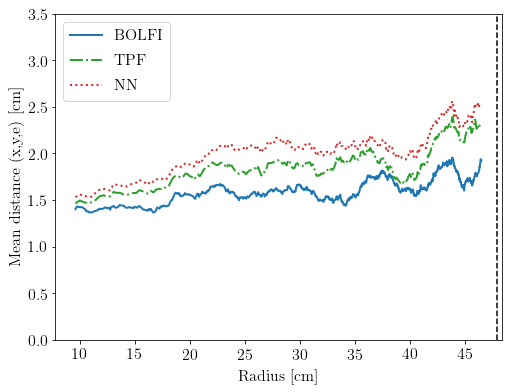

In [48]:
plt.figure(figsize=(8,6))

rs, mins, means, maxs = get_rolling(df_25, 'BOLFI_mean')
plt.plot(rs, means, linewidth=2, label='BOLFI')
#plt.fill_between(rs, maxs, mins, alpha=0.2)

#rs, mins, means, maxs = get_rolling(df_top_25, 'BOLFI_mean')
#plt.plot(rs, means, linewidth=2, label='BOLFI (Euclidean)', linestyle='--')
#plt.fill_between(rs, maxs, mins, alpha=0.2)

rs, mins, means, maxs = get_rolling(df_25, 'PosRecTopPatternFit')
plt.plot(rs[::3], means[::3], linewidth=2, label='TPF', linestyle='-.', color='C2')
#plt.fill_between(rs, maxs, mins, alpha=0.2)

rs, mins, means, maxs = get_rolling(df_25, 'PosRecNeuralNet')
plt.plot(rs[::3], means[::3], linewidth=2, label='NN', linestyle=':', color='C3')
#plt.fill_between(rs, maxs, mins, alpha=0.1)

plt.axvline(47.9, color='k', linestyle='--')
plt.legend(loc='upper left')
plt.ylim(0, 3.5)
plt.xlabel('Radius [cm]')
plt.ylabel('Mean distance (x,y,e) [cm]')
plt.savefig('FM3_radial_mix_xye_mean_25_paper.png', bbox_inches='tight', dpi=150)
plt.show()

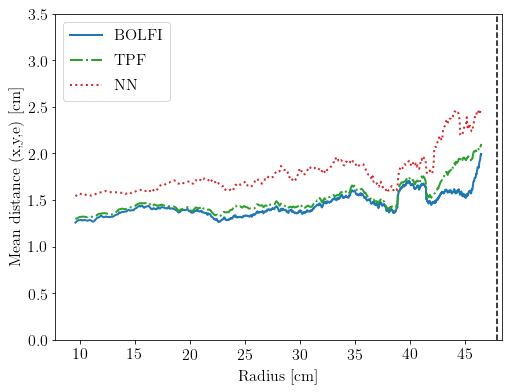

In [50]:
plt.figure(figsize=(8,6))

rs, mins, means, maxs = get_rolling(df_10, 'BOLFI_mean')
plt.plot(rs, means, linewidth=2, label='BOLFI')
#plt.fill_between(rs, maxs, mins, alpha=0.2)

#rs, mins, means, maxs = get_rolling(df_eu_10, 'BOLFI_mean')
#plt.plot(rs, means, linewidth=2, label='BOLFI (Euclidean)', linestyle='--')
#plt.fill_between(rs, maxs, mins, alpha=0.2)

rs, mins, means, maxs = get_rolling(df_10, 'PosRecTopPatternFit')
plt.plot(rs[::3], means[::3], linewidth=2, label='TPF', linestyle='-.', color='C2')
#plt.fill_between(rs, maxs, mins, alpha=0.2)

rs, mins, means, maxs = get_rolling(df_10, 'PosRecNeuralNet')
plt.plot(rs[::3], means[::3], linewidth=2, label='NN', linestyle=':', color='C3')
#plt.fill_between(rs, maxs, mins, alpha=0.1)

plt.axvline(47.9, color='k', linestyle='--')
plt.legend(loc='upper left')
plt.ylim(0, 3.5)
plt.xlabel('Radius [cm]')
plt.ylabel('Mean distance (x,y,e) [cm]')
plt.savefig('FM3_radial_mix_xye_mean_10_paper.png', bbox_inches='tight', dpi=150)
plt.show()